## ESTADISTICA INFERENCIAL

### Medicamentos

### Intervalos de Confianza

In [1]:
# Librerias importadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
np.random.seed(42)

In [3]:
dias_gym = np.array(['L', 'M', 'X', 'J', 'V'])

In [4]:
np.random.choice(dias_gym, size=7, replace=True)

array(['J', 'V', 'X', 'V', 'V', 'M', 'X'], dtype='<U1')

In [5]:
df_medicamentos = pd.read_csv("db/medicamentos.csv")
df_medicamentos

,ID,RES
0,93482,-0.936695
1,67097,1.357963
2,7351,0.455959
3,27307,-6.120740
4,34670,5.283167
...,...,...
98798,7165,0.327101
98799,95040,1.784185
98800,36506,6.695646
98801,75501,1.690019


In [6]:
df_muestra = df_medicamentos['RES'][:150]
df_muestra

0     -0.936695
1      1.357963
2      0.455959
3     -6.120740
4      5.283167
         ...   
145    1.610722
146    0.946610
147    3.855820
148   -1.903128
149    0.064430
Name: RES, Length: 150, dtype: float64

In [7]:
df_muestra.describe()

count    150.000000
mean       0.671218
std        2.607556
min       -7.280460
25%       -1.111397
50%        0.770669
75%        2.559809
max        6.695646
Name: RES, dtype: float64

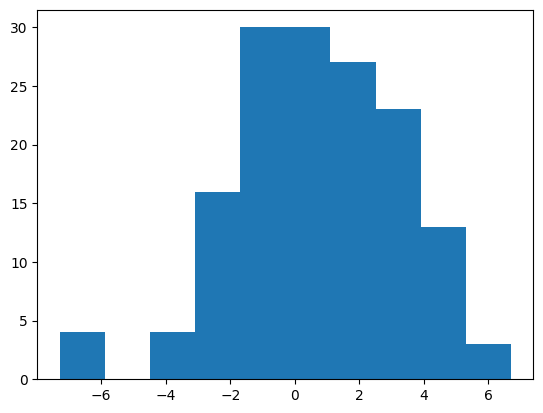

In [8]:
plt.hist(df_muestra);

### BOOTSTRAPPING

In [9]:
boot_medias = []

for _ in range(10000):
    boot_datos = df_muestra.sample(150, replace=True)
    boot_medias.append(boot_datos.mean())

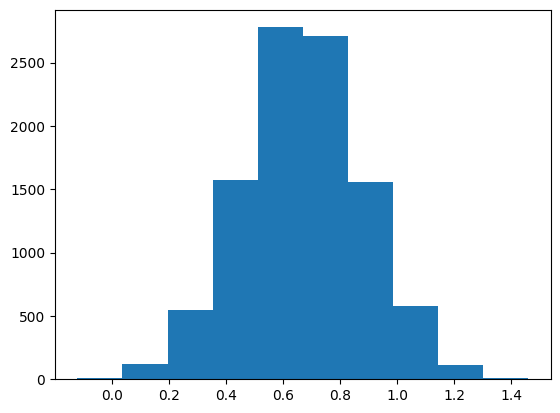

In [10]:
plt.hist(boot_medias);

#### Intervalo de confianza de confianza

In [11]:
# Intervalo de confianza del 95%
intervalo_95 = np.percentile(boot_medias, 2.5), np.percentile(boot_medias, 97.5)
print(f"La media poblacional se encuentra entre: {intervalo_95[0]} - {intervalo_95[1]}")

La media poblacional se encuentra entre: 0.2506102706755364 - 1.0887916918714737


#### Con un confianza del 95%, se entiende que la media poblacionan estará entre '0.2506102706755364 - 1.0887916918714737'

##### Media poblaconal

In [12]:
# Media de los datos de la población
print(f"La media de la población es: {df_medicamentos['RES'].mean()}")


La media de la población es: 0.744171639723178


## Nacimientos

### Calcular Intervalo de Confianza con un nivel de confianza del 95% para el peso medio de un recién nacido

##### Población

In [13]:
df_naciemientos = pd.read_csv("db/nacimientos.csv")
df_macimientos_muestra = df_naciemientos[:150]
df_macimientos_muestra

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,PESO
0,1,1,27.4,0,3655,7,2017,1,4,11,...,0,0,150,3,1,N,0,F,46,3655
1,1,1,18.7,0,3520,5,2017,1,2,1123,...,0,0,102,3,1,N,0,M,40,3520
2,1,1,44.3,0,2920,5,2017,1,2,107,...,1,0,250,1,1,N,0,F,19,2920
3,1,1,23.7,0,4100,8,2017,2,5,1056,...,3,0,165,4,2,Y,1,F,61,4100
4,1,1,20.2,0,4349,8,2017,,6,244,...,1,0,129,1,1,N,0,M,25,4349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,1,25.2,0,3374,8,2017,1,5,1409,...,1,0,125,4,1,Y,1,M,33,3374
146,1,1,26.5,0,2570,12,2017,1,9,1649,...,0,1,164,1,2,N,0,M,22,2570
147,1,1,23.2,0,3894,4,2017,1,1,1759,...,1,1,119,1,1,N,0,M,31,3894
148,1,1,34.4,0,3581,4,2017,1,1,2025,...,2,4,233,1,2,N,0,M,14,3581


##### Muestra

In [14]:
df_naciemientos_peso_muestra = df_macimientos_muestra[['PESO']]
df_naciemientos_peso_muestra

,PESO
0,3655
1,3520
2,2920
3,4100
4,4349
...,...
145,3374
146,2570
147,3894
148,3581


In [15]:
df_naciemientos_peso_muestra.describe()

,PESO
count,150.000000
mean,3313.473333
std,527.439372
min,1588.000000
25%,2993.750000
50%,3299.500000
75%,3678.500000
max,4423.000000


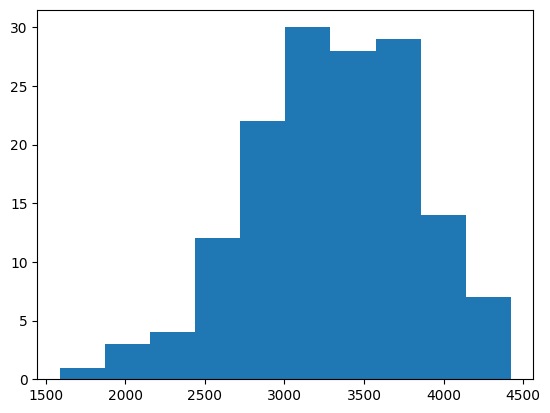

In [16]:
plt.hist(df_naciemientos_peso_muestra);

### BOOTSTRAPPING

In [17]:
boot_meadias = []

for _ in range(10000):
    df_boot = df_naciemientos_peso_muestra.sample(150, replace=True)
    boot_meadias.append(df_boot['PESO'].mean())

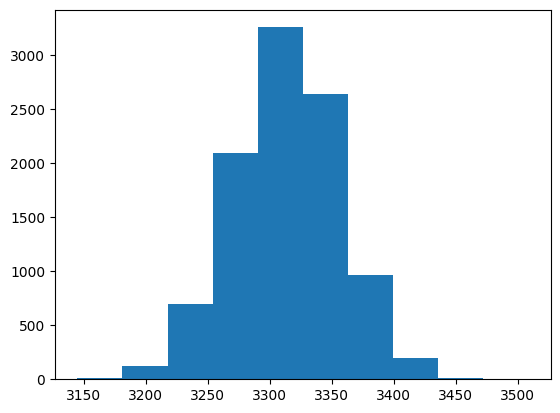

In [18]:
plt.hist(boot_meadias);

#### Intervalo de confianza de confianza

In [24]:
intervalo_naciemientos = np.percentile(boot_meadias, 2.5), np.percentile(boot_meadias, 97.5)

In [25]:
print(f"La media poblacional se encuentra entre: {intervalo_naciemientos[0]} - {intervalo_naciemientos[1]}")

La media poblacional se encuentra entre: 3228.735333333333 - 3397.3085


### Media poblacional

In [27]:
print(f"La media de la población es: {df_naciemientos['PESO'].mean()}")

La media de la población es: 3257.014866666667
